# Importaciones

In [1]:
#@title Las librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#@title Los archivos desde github

tcd = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/customer_details.csv')
tec = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/E-commerece%20sales%20data%202024.csv')
tpd = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/product_details.csv')


# Investigo las tablas


##tabla_customer_details

In [3]:
tcd.shape

(3900, 18)

In [4]:
tcd.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
tcd.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


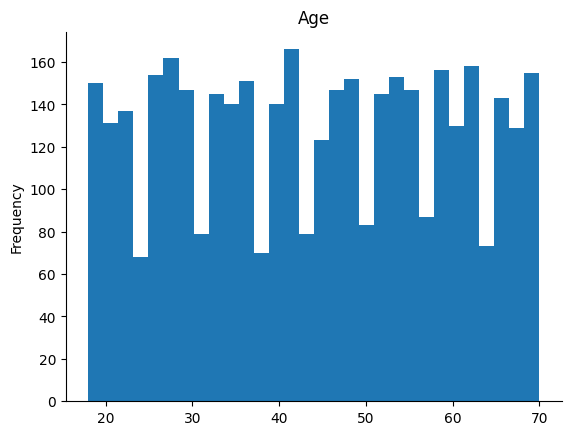

In [6]:
# @title Age

tcd['Age'].plot(kind='hist', bins=30, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

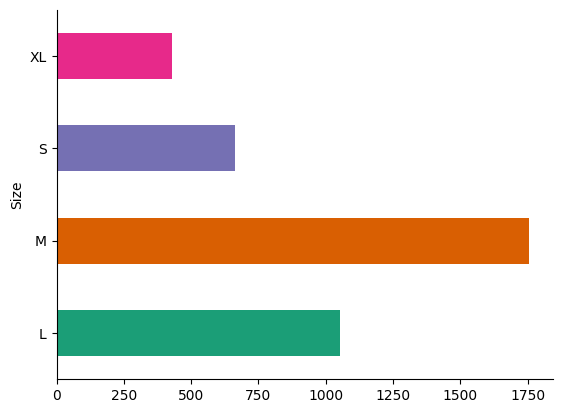

In [7]:
# @title Size type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tcd.groupby('Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

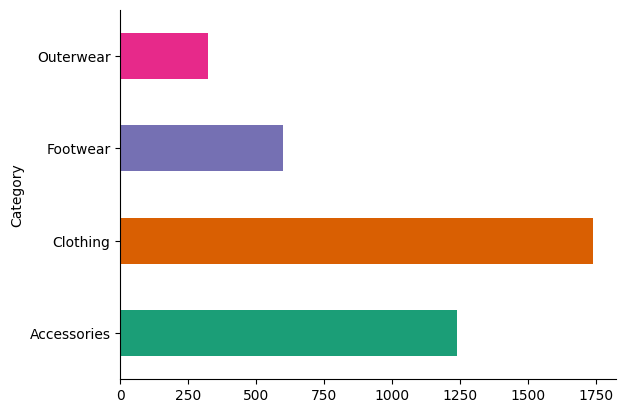

In [8]:
# @title Category type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tcd.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

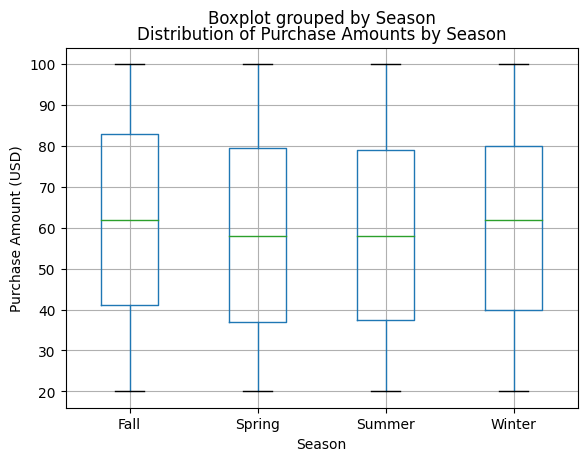

In [9]:
# @title Distribution of Purchase Amounts by Season

tcd.boxplot(column='Purchase Amount (USD)', by='Season')
plt.title('Distribution of Purchase Amounts by Season')
plt.xlabel('Season')
_ = plt.ylabel('Purchase Amount (USD)')

###Veo cuanta es la cantidad de nulos

In [10]:
# Calculo la cantidad de valores nulos por columna
tcd_nulos_por_columna = tcd.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tcd_nulos_por_columna)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


Podria sacar "Discount Applied", "Promo Code Used", "Previous Purchases", "Payment Method", "Frequency of Purchases"¿?

##tabla_e_commerce

In [11]:
tec.shape

(3294, 5)

In [12]:
tec.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Unnamed: 4'],
      dtype='object')

In [13]:
tec.tail()

,user id,product id,Interaction type,Time stamp,Unnamed: 4
3289,NaN,NaN,NaN,NaN,NaN
3290,NaN,NaN,NaN,NaN,NaN
3291,NaN,NaN,NaN,NaN,NaN
3292,NaN,NaN,NaN,NaN,NaN
3293,NaN,NaN,NaN,NaN,NaN


In [14]:
#como me trajo varios nulos utilizo sample para ver si puedo encontrar otra muestra que me de más información
tec.sample(10)

,user id,product id,Interaction type,Time stamp,Unnamed: 4
2290,2291.0,9377447913a3ad46fb2b4ce72c2285a2,like,29/07/2023 10:00,NaN
1774,1775.0,861836aa3cf197e092fb8361f5bd9b93,view,23/03/2023 10:00,NaN
2802,2803.0,f5cb073b053be16e635c286e83a94ea8,like,12/09/2023 10:00,NaN
501,502.0,2eae820fc975e1b08f2c2992c65473ab,purchase,02/11/2023 8:00,NaN
275,276.0,d49b828318fdd2a558f8009a4dddab7d,NaN,23/03/2023 10:00,NaN
2517,2518.0,0d4641efeb17d50f805ee5545aa7e1fb,like,03/12/2023 8:00,NaN
2265,2266.0,87366a8f9cd8179fb7fe9021e9a2d2d2,view,04/07/2023 10:00,NaN
3097,NaN,NaN,NaN,NaN,NaN
2230,2231.0,eb7c818bc2937c6d0d6c56f42d3ab09a,like,30/05/2023 10:00,NaN
60,61.0,5483f67f50a97a8dd7f404f80eab75e1,purchase,09/12/2023 8:00,NaN


In [15]:
tec.values

array([[1.0, '4c69b61db1fc16e7013b43fc926e502d', 'purchase',
        '10/10/2023 8:00', nan],
       [2.0, '66d49bbed043f5be260fa9f7fbff5957', 'view',
        '11/10/2023 8:00', nan],
       [3.0, '2c55cae269aebf53838484b0d7dd931a', 'like',
        '12/10/2023 8:00', nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]], dtype=object)

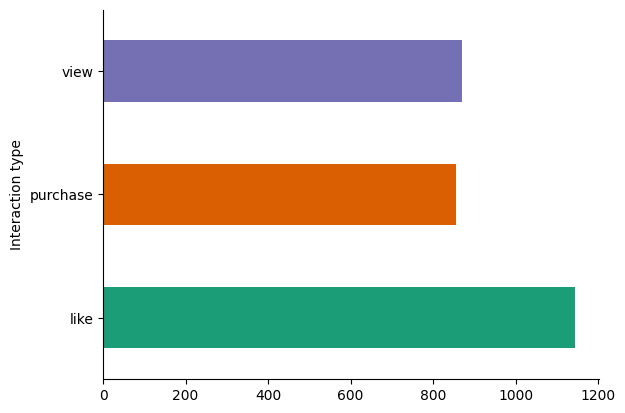

In [16]:
# @title Interaction type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tec.groupby('Interaction type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Veo cuanta es la cantidad de nulos

In [17]:
# Calculo la cantidad de valores nulos por columna
tec_nulos_por_columna = tec.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tec_nulos_por_columna)

user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64


##tabla_product_details

In [18]:
tpd.shape

(10002, 28)

In [19]:
tpd.columns

Index(['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')

In [20]:
tpd.sample(10)

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
8544,ff49e6a4d01f134f0cee0bef2d70ce23,"Oasis Supply Spiral Birthday Candles, 2.25-Inch",NaN,NaN,Home & Kitchen | Home Décor | Candles & Holder...,NaN,NaN,$71.42,NaN,NaN,...,https://www.amazon.com/Oasis-Supply-Birthday-C...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2259,a9529e9e7023167626d44b86c2b415e8,The Tin Box Company Batman Head Shape Tin Carr...,NaN,NaN,Toys & Games | Party Supplies | Party Packs,NaN,NaN,$8.45,NaN,848207-12,...,https://www.amazon.com/Tin-Box-Company-Batman-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
7285,0822ffab95aa10adb52d4e60f4374c2c,Forum Novelties Adult Everything Ugly Christma...,NaN,NaN,"Clothing, Shoes & Jewelry | Costumes & Accesso...",NaN,NaN,$11.99 - $42.74,NaN,NaN,...,https://www.amazon.com/Forum-Womens-Everything...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1036,49440a80718767333cdf554943c69889,Rubie's Costume Boys Justice League Deluxe Fla...,NaN,NaN,Toys & Games | Dress Up & Pretend Play | Costumes,NaN,NaN,$19.46,NaN,630977,...,https://www.amazon.com/Rubies-Costume-Justice-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1465,f798f0a965374b15e3a361c48b23e068,"amscan Disney/Pixar Incredibles 2"" Scene Sette...",NaN,NaN,Toys & Games | Party Supplies | Party Favors,NaN,NaN,$9.12,NaN,670742,...,https://www.amazon.com/Amscan-Disney-Incredibl...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
7198,0c628bc7e1bacf224ac2694f1f141fc5,MasterPieces Lionel Collector's Steam Engine &...,NaN,NaN,Toys & Games | Learning & Education,NaN,NaN,$14.99,NaN,NaN,...,https://www.amazon.com/MasterPieces-Lionel-Col...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
6944,0a51537e868a72c61353d3f9a2b5a60b,The Kids Room by Stupell Dino Crossing Blue Gr...,NaN,NaN,Baby Products | Nursery | Décor | Wall Décor |...,NaN,NaN,$29.99,NaN,brp-2473_wd_10x15,...,https://www.amazon.com/Kids-Room-Stupell-Cross...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
8231,3059cfe57bc6c958ea6b31da16926f48,"Tamiya America, Inc 1/48 Japan Self Defense Ty...",NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$26.40,NaN,TAM32596,...,https://www.amazon.com/Tamiya-America-Defense-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
9361,8c4ca592235b69ff9bed5dad5f67e1f8,Amscan 122086 Rainbow Butterfly Unicorn Kitty ...,NaN,NaN,Toys & Games | Party Supplies | Banners,NaN,NaN,$22.58,NaN,122086,...,https://www.amazon.com/122086-Rainbow-Butterfl...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3539,eaa92689f4401262bffb75378cc4e48a,Disney Pixar Cars Floyd Mulvihill Launcher,NaN,NaN,Toys & Games | Play Vehicles | Toy Vehicles,NaN,NaN,$11.01,NaN,FLH77,...,https://www.amazon.com/Disney-Pixar-Floyd-Mulv...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


###Veo cuanta es la cantidad de nulos

In [21]:
# Calculo la cantidad de valores nulos por columna
tpd_nulos_por_columna = tpd.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tpd_nulos_por_columna)

Uniqe Id                     0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
dtype: int64


In [42]:
# @title Interaction type
tpd.value_counts('Size Quantity Variant')

Series([], Name: count, dtype: int64)

#MERGE

##Genero la union de las tres tablas por medio de la tabla e_commerce que contiene las columnas 'user id' y 'product id'.

*   Conecto con la tabla "customer_details" por medio de la columna 'Customer ID'
*   Conecto con la tabla "product_details" por medio de la columna 'Uniqe Id'
## Utilizo la union outter para traerme todos los datos y despues poder analizar todos en conjunto.

In [22]:
#Genero la union de las tres tablas por medio de la tabla e_commerce que contiene las columnas 'user id', 'product id'

In [25]:
print(tpd.columns)

Index(['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')


In [26]:
print(tec.columns)

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Unnamed: 4'],
      dtype='object')


In [27]:
print(tcd.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [32]:
# @title Outer merge entre product_details(tpd) y e_commerce(tec)
merge_tpd_tec= pd.merge(tpd,tec,left_on='Uniqe Id', right_on= 'product id', how='outer')
merge_tpd_tec

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,NaN,NaN,Y,NaN,NaN,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,NaN,NaN,Y,NaN,NaN,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,NaN,NaN,Y,NaN,NaN,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,NaN,NaN,Y,NaN,NaN,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,NaN,NaN,Y,NaN,NaN,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# @title Outer merge del merge anterior(merge_tpd_tec) y customer_details(tcd)
# Genero una tabla donde esten todos los campos y así, analizar toda la información en conjunto sin dejar de lado vacios que por querer descartar rapido podría estar dejando de lado información relevante
full_merge= pd.merge(tcd,merge_tpd_tec,left_on='Customer ID', right_on= 'user id', how='outer')
full_merge

,Customer ID,Age,Gender,Item Purchased,Category_x,Purchase Amount (USD),Location,Size,Color_x,Season,...,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,NaN,NaN,Y,NaN,NaN,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,NaN,NaN,Y,NaN,NaN,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,NaN,NaN,Y,NaN,NaN,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,NaN,NaN,Y,NaN,NaN,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,NaN,NaN,Y,NaN,NaN,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Purchase Amount (USD)'].plot(kind='hist', bins=20, title='Purchase Amount (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Category_x').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='Customer ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Customer ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Age', y='Purchase Amount (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Purchase Amount (USD)', y='Review Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Customer ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Customer ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Customer ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category_x')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category_x', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Customer ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Customer ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Size')):
  _plot_series(series, series_name, i)
  fig.legend(title='Size', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Customer ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Customer ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Customer ID')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Purchase Amount (USD)'].plot(kind='line', figsize=(8, 4), title='Purchase Amount (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Category_x'].value_counts()
    for x_label, grp in _df_20.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Category_x')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Size'].value_counts()
    for x_label, grp in _df_21.groupby('Category_x')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category_x')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Season'].value_counts()
    for x_label, grp in _df_22.groupby('Size')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Size')
_ = plt.ylabel('Season')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Subscription Status'].value_counts()
    for x_label, grp in _df_23.groupby('Season')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Season')
_ = plt.ylabel('Subscription Status')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Category_x'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='Category_x', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='Size', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
full_merge.isnull().sum()

Customer ID                7298
Age                        7298
Gender                     7298
Item Purchased             7298
Category_x                 7298
Purchase Amount (USD)      7298
Location                   7298
Size                       7298
Color_x                    7298
Season                     7298
Review Rating              7298
Subscription Status        7298
Shipping Type              7298
Discount Applied           7298
Promo Code Used            7298
Previous Purchases         7298
Payment Method             7298
Frequency of Purchases     7298
Uniqe Id                   1196
Product Name               1196
Brand Name                11198
Asin                      11198
Category_y                 2026
Upc Ean Code              11164
List Price                11198
Selling Price              1303
Quantity                  11198
Model Number               2968
About Product              1469
Product Specification      2828
Technical Details          1986
Shipping

In [35]:
full_merge.isnull().sum()/full_merge.shape[0]

Customer ID               0.651724
Age                       0.651724
Gender                    0.651724
Item Purchased            0.651724
Category_x                0.651724
Purchase Amount (USD)     0.651724
Location                  0.651724
Size                      0.651724
Color_x                   0.651724
Season                    0.651724
Review Rating             0.651724
Subscription Status       0.651724
Shipping Type             0.651724
Discount Applied          0.651724
Promo Code Used           0.651724
Previous Purchases        0.651724
Payment Method            0.651724
Frequency of Purchases    0.651724
Uniqe Id                  0.106805
Product Name              0.106805
Brand Name                1.000000
Asin                      1.000000
Category_y                0.180925
Upc Ean Code              0.996964
List Price                1.000000
Selling Price             0.116360
Quantity                  1.000000
Model Number              0.265047
About Product       

In [43]:
full_merge.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Brand Name,Asin,List Price,Quantity,Sku,Stock,Product Details,Dimensions,Color_y,Ingredients,Direction To Use,Size Quantity Variant,Product Description,user id,Unnamed: 4
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2999.000000,0.0
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN
std,1125.977353,15.207589,23.685392,0.716223,14.447125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,865.881054,NaN
min,1.000000,18.000000,20.000000,2.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,975.750000,31.000000,39.000000,3.100000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.500000,NaN
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2249.500000,NaN
max,3900.000000,70.000000,100.000000,5.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999.000000,NaN
